<img src="./figures/pylogo.png" alt="Indentation" width="50%" height="50%">



## Project 2: ECCC Precipitation Data

We will continue to discover the functionality of these libraries in a practical case by now analyzing the daily precipitation data recorded by the ECCC stations located at the Montreal Trudeau Airport between the period 1961 and 2010.

We will use 'MONTREAL_preacc_1961_2010.dat' file in .data/ directory. 

### 1- Opening and reading our time series

In [4]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

df_Precipitation = pd.DataFrame()
# Ouverture du fichier text  
with open('./DATA/MONTREAL_preacc_1961_2010.dat', 'r') as file:
     rows = file.read()
data_EC_Montreal = [float(row) for row in rows.split()]  

# We know that the time series begins on January 1, 1961
# and ends on December 31, 2010
# We can rebuild the index of Dataframes

start = date(1961, 1, 1)
end = date(2010, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

# Create a column from the datetime datatype
df_Precipitation['datetime'] = rng
# Set the datetime column as the index
df_Precipitation.index = df_Precipitation['datetime'] 

# Create a column from the numeric score variable
df_Precipitation['Precipitation Montreal'] = data_EC_Montreal

In [5]:
df_Precipitation.head()

,datetime,Precipitation Montreal
datetime,,
1961-01-01,1961-01-01,22.66
1961-01-02,1961-01-02,1.05
1961-01-03,1961-01-03,1.05
1961-01-04,1961-01-04,0.66
1961-01-05,1961-01-05,0.00


In [6]:
from tabulate import tabulate
print(tabulate(df_Precipitation.head(), headers='keys', tablefmt='pipe'))

| datetime            | datetime            |   Precipitation Montreal |
|:--------------------|:--------------------|-------------------------:|
| 1961-01-01 00:00:00 | 1961-01-01 00:00:00 |                    22.66 |
| 1961-01-02 00:00:00 | 1961-01-02 00:00:00 |                     1.05 |
| 1961-01-03 00:00:00 | 1961-01-03 00:00:00 |                     1.05 |
| 1961-01-04 00:00:00 | 1961-01-04 00:00:00 |                     0.66 |
| 1961-01-05 00:00:00 | 1961-01-05 00:00:00 |                     0    |


### 2- Applying functions to DataFram:  precipitation indices:

- CDD: calculation of the maximum number of consecutive dry days (Precipitation <1mm)
- CWD: calculation of the maximum number of consecutive wet days (Precipitation> 1mm)
- Prcp1: calculation of the percentage of precipitation days (Precipitation> 1mm)
- SDII: calculation of the precipitation intensity average for wet days (Precipitation> 1mm

In [7]:
# calculation of the maximum number of consecutive dry days (inf to 1mm) 
# on the incoming signal (less than 20% of missing values) 
def CDD(S):
     import numpy as np
     ind_CDD=[]
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_CDD = np.empty(1)
         ind_CDD = np.nan
     else:
         temp = 0
         ind_CDD = 0 
         j =0
         while (j < N2):
             while (j < N2 ) and (S_no_nan[j] < 1.0 ):
                 j += 1
                 temp +=1
             if ind_CDD < temp:
                 ind_CDD = temp
             temp = 0
             j += 1 
     return ind_CDD      
 
# calculation of the maximum number of consecutive wet days (sup to 1mm) 
# on the incoming signal (less than 20% of missing values) 
def CWD(S):
     import numpy as np
     ind_CWD=[]
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_CWD = np.empty(1)
         ind_CWD = np.nan
     else:
         temp = 0
         ind_CWD = 0 
         j =0
         while (j < N2):
             while (j < N2 ) and (S_no_nan[j] > 1.0 ):
                 j += 1
                 temp +=1
             if ind_CWD < temp:
                 ind_CWD = temp
             temp = 0
             j += 1 
     return ind_CWD  

# Calculation of the percentage of precipitation days 
# on the incoming signal (less than 20% of missing values)
def Prcp1(S):
     import numpy as np
     ind_Prcp1=[]
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if (N2 == 0):
         N2=1
         
     if ((N2/N) < 0.8): 
         ind_Prcp1 = np.empty(1)
         ind_Prcp1 = np.nan
     else:
         ind_Prcp1 = 0
         for row in S_no_nan:
             if row >= 1 :
                 ind_Prcp1 += 1 
                 
         ind_Prcp1 = 100 * (ind_Prcp1/N2)
     return ind_Prcp1     

# average precipitation intensity for wet days (PR greater than 1mm) (less than 20% missing values)

def SDII(S):
     import numpy as np
     ind_SDII=[]
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_SDII = np.empty(1)
         ind_SDII = np.nan
     else:
         SS = S[S > 1]        
         ind_SDII = np.nanmean(SS)
     return ind_SDII      

The previous functions make it possible to calculate precipitation indices on a daily signal. We want to apply these functions per month.

So we have to work with a subset of our <b> df_Precipitation </b> dataframe grouped by month.

In the same way as the previous section on temperatures, we will apply the <b> .resample ('M') </b> method: "M" for months (it's possible here to work at week , season or year scale)
As a reminder, at this stage there is no calculation, the data are simply sorted on a monthly basis.

In [8]:
df_Precipitation_resamp = df_Precipitation.resample('M')
df_Precipitation_resamp.count().head()            

,datetime,Precipitation Montreal
datetime,,
1961-01-31,31,31
1961-02-28,28,28
1961-03-31,31,31
1961-04-30,30,30
1961-05-31,31,31


In [9]:
from tabulate import tabulate
print(tabulate(df_Precipitation_resamp.count().head() , headers='keys', tablefmt='pipe'))

| datetime            |   datetime |   Precipitation Montreal |
|:--------------------|-----------:|-------------------------:|
| 1961-01-31 00:00:00 |         31 |                       31 |
| 1961-02-28 00:00:00 |         28 |                       28 |
| 1961-03-31 00:00:00 |         31 |                       31 |
| 1961-04-30 00:00:00 |         30 |                       30 |
| 1961-05-31 00:00:00 |         31 |                       31 |


We can now apply our functions defined previously for each month of our DataFrame. For this, we will use the <b> .agg () </b> method on our subset grouped by month.

In [10]:
indice_precipitation = df_Precipitation_resamp.agg([CDD, CWD, Prcp1, SDII, np.sum, np.mean])
indice_precipitation.head()

Precipitation Montreal                                             
                              CDD  CWD      Prcp1       SDII     sum      mean
datetime                                                                      
1961-01-31                   14.0  3.0  29.032258   5.691111   55.09  1.777097
1961-02-28                   12.0  3.0  28.571429   9.895000   80.87  2.888214
1961-03-31                   16.0  3.0  25.806452  11.868750   97.59  3.148065
1961-04-30                    4.0  3.0  50.000000   6.683333  102.70  3.423333
1961-05-31                    5.0  3.0  41.935484   5.130000   70.22  2.265161

In [11]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   ('Precipitation Montreal', 'CDD') |   ('Precipitation Montreal', 'CWD') |   ('Precipitation Montreal', 'Prcp1') |   ('Precipitation Montreal', 'SDII') |   ('Precipitation Montreal', 'sum') |   ('Precipitation Montreal', 'mean') |
|:--------------------|------------------------------------:|------------------------------------:|--------------------------------------:|-------------------------------------:|------------------------------------:|-------------------------------------:|
| 1961-01-31 00:00:00 |                                  14 |                                   3 |                               29.0323 |                              5.69111 |                               55.09 |                              1.7771  |
| 1961-02-28 00:00:00 |                                  12 |                                   3 |                               28.5714 |                              9.895   |                               80.87 |                

### 3- Filter the data directly on a dataframe

- the data can be filtered according to a condition on a column.

We will for example only extract precipitation data greater than or equal to 1mm.

In [12]:
SDII2=df_Precipitation[df_Precipitation["Precipitation Montreal"]>=1.0]
SDII2.head()

,datetime,Precipitation Montreal
datetime,,
1961-01-01,1961-01-01,22.66
1961-01-02,1961-01-02,1.05
1961-01-03,1961-01-03,1.05
1961-01-06,1961-01-06,8.65
1961-01-07,1961-01-07,4.05


In [14]:
from tabulate import tabulate
print(tabulate(SDII2.head() , headers='keys', tablefmt='pipe'))

| datetime            | datetime            |   Precipitation Montreal |
|:--------------------|:--------------------|-------------------------:|
| 1961-01-01 00:00:00 | 1961-01-01 00:00:00 |                    22.66 |
| 1961-01-02 00:00:00 | 1961-01-02 00:00:00 |                     1.05 |
| 1961-01-03 00:00:00 | 1961-01-03 00:00:00 |                     1.05 |
| 1961-01-06 00:00:00 | 1961-01-06 00:00:00 |                     8.65 |
| 1961-01-07 00:00:00 | 1961-01-07 00:00:00 |                     4.05 |


We first created a Boolean type mask on the column 'Precipitation Montreal' which was then applied to our DataFrame.

In [15]:
(df_Precipitation["Precipitation Montreal"]>1.0).head()

datetime
1961-01-01     True
1961-01-02     True
1961-01-03     True
1961-01-04    False
1961-01-05    False
Name: Precipitation Montreal, dtype: bool

We then group our DataFrame by month and we apply a function by calling .agg() method. 

In [16]:
SDII2 = SDII2.resample('M').agg({'SDII2': lambda x: x.mean()})
SDII2.head()

,SDII2
,Precipitation Montreal
datetime,
1961-01-31,5.691111
1961-02-28,9.895000
1961-03-31,11.868750
1961-04-30,6.683333
1961-05-31,5.130000


In [17]:
from tabulate import tabulate
print(tabulate(SDII2.head() , headers='keys', tablefmt='pipe'))

| datetime            |   ('SDII2', 'Precipitation Montreal') |
|:--------------------|--------------------------------------:|
| 1961-01-31 00:00:00 |                               5.69111 |
| 1961-02-28 00:00:00 |                               9.895   |
| 1961-03-31 00:00:00 |                              11.8688  |
| 1961-04-30 00:00:00 |                               6.68333 |
| 1961-05-31 00:00:00 |                               5.13    |


### 4- Updating our initial DataFrame 

We want to add to our initial DataFrame the variable SDII2 previously created. 

In [18]:
indice_precipitation["SDII2"]=SDII2[:].values

In [19]:
indice_precipitation.head()

Precipitation Montreal                                     \
                              CDD  CWD      Prcp1       SDII     sum   
datetime                                                               
1961-01-31                   14.0  3.0  29.032258   5.691111   55.09   
1961-02-28                   12.0  3.0  28.571429   9.895000   80.87   
1961-03-31                   16.0  3.0  25.806452  11.868750   97.59   
1961-04-30                    4.0  3.0  50.000000   6.683333  102.70   
1961-05-31                    5.0  3.0  41.935484   5.130000   70.22   

                          SDII2  
                mean             
datetime                         
1961-01-31  1.777097   5.691111  
1961-02-28  2.888214   9.895000  
1961-03-31  3.148065  11.868750  
1961-04-30  3.423333   6.683333  
1961-05-31  2.265161   5.130000

In [20]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   ('Precipitation Montreal', 'CDD') |   ('Precipitation Montreal', 'CWD') |   ('Precipitation Montreal', 'Prcp1') |   ('Precipitation Montreal', 'SDII') |   ('Precipitation Montreal', 'sum') |   ('Precipitation Montreal', 'mean') |   ('SDII2', '') |
|:--------------------|------------------------------------:|------------------------------------:|--------------------------------------:|-------------------------------------:|------------------------------------:|-------------------------------------:|----------------:|
| 1961-01-31 00:00:00 |                                  14 |                                   3 |                               29.0323 |                              5.69111 |                               55.09 |                              1.7771  |         5.69111 |
| 1961-02-28 00:00:00 |                                  12 |                                   3 |                               28.5714 |                              9.895   |

In [21]:
indice_precipitation.columns = indice_precipitation.columns.droplevel(0)

In [22]:
indice_precipitation.head()

,CDD,CWD,Prcp1,SDII,sum,mean,
datetime,,,,,,,
1961-01-31,14.0,3.0,29.032258,5.691111,55.09,1.777097,5.691111
1961-02-28,12.0,3.0,28.571429,9.895000,80.87,2.888214,9.895000
1961-03-31,16.0,3.0,25.806452,11.868750,97.59,3.148065,11.868750
1961-04-30,4.0,3.0,50.000000,6.683333,102.70,3.423333,6.683333
1961-05-31,5.0,3.0,41.935484,5.130000,70.22,2.265161,5.130000


In [23]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   CDD |   CWD |   Prcp1 |     SDII |    sum |    mean |          |
|:--------------------|------:|------:|--------:|---------:|-------:|--------:|---------:|
| 1961-01-31 00:00:00 |    14 |     3 | 29.0323 |  5.69111 |  55.09 | 1.7771  |  5.69111 |
| 1961-02-28 00:00:00 |    12 |     3 | 28.5714 |  9.895   |  80.87 | 2.88821 |  9.895   |
| 1961-03-31 00:00:00 |    16 |     3 | 25.8065 | 11.8687  |  97.59 | 3.14806 | 11.8688  |
| 1961-04-30 00:00:00 |     4 |     3 | 50      |  6.68333 | 102.7  | 3.42333 |  6.68333 |
| 1961-05-31 00:00:00 |     5 |     3 | 41.9355 |  5.13    |  70.22 | 2.26516 |  5.13    |


Using index datetime column, we want to create new columns with year and month.

In [24]:
indice_precipitation['year']  = indice_precipitation.index.year
indice_precipitation['month']  = indice_precipitation.index.month
indice_precipitation['month'] = indice_precipitation.index.strftime('%b')

In [25]:
indice_precipitation.head()

,CDD,CWD,Prcp1,SDII,sum,mean,,year,month
datetime,,,,,,,,,
1961-01-31,14.0,3.0,29.032258,5.691111,55.09,1.777097,5.691111,1961,Jan
1961-02-28,12.0,3.0,28.571429,9.895000,80.87,2.888214,9.895000,1961,Feb
1961-03-31,16.0,3.0,25.806452,11.868750,97.59,3.148065,11.868750,1961,Mar
1961-04-30,4.0,3.0,50.000000,6.683333,102.70,3.423333,6.683333,1961,Apr
1961-05-31,5.0,3.0,41.935484,5.130000,70.22,2.265161,5.130000,1961,May


In [26]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   CDD |   CWD |   Prcp1 |     SDII |    sum |    mean |          |   year | month   |
|:--------------------|------:|------:|--------:|---------:|-------:|--------:|---------:|-------:|:--------|
| 1961-01-31 00:00:00 |    14 |     3 | 29.0323 |  5.69111 |  55.09 | 1.7771  |  5.69111 |   1961 | Jan     |
| 1961-02-28 00:00:00 |    12 |     3 | 28.5714 |  9.895   |  80.87 | 2.88821 |  9.895   |   1961 | Feb     |
| 1961-03-31 00:00:00 |    16 |     3 | 25.8065 | 11.8687  |  97.59 | 3.14806 | 11.8688  |   1961 | Mar     |
| 1961-04-30 00:00:00 |     4 |     3 | 50      |  6.68333 | 102.7  | 3.42333 |  6.68333 |   1961 | Apr     |
| 1961-05-31 00:00:00 |     5 |     3 | 41.9355 |  5.13    |  70.22 | 2.26516 |  5.13    |   1961 | May     |


We want to save our Dataframe <b>indice_precipitation</b>.

In [27]:
indice_precipitation.to_csv('indice_precipitation.csv')

### 4- Viewing the results

We will visualize our final dataframe <b> index_precipitation </b> with the Seaborn library.
<img src = "./figures/seaborn.png" alt = "Seaborn" width = "60%" height = "70%">

However, we will see some examples with multi-dimensional graphics.
- Boxplot: <b>boxplot()</b> function


Let's use our precipitation DataFrame: 

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [37]:
indice_precipitation.head()

,CDD,CWD,Prcp1,SDII,sum,mean,,year,month
datetime,,,,,,,,,
1961-01-31,14.0,3.0,29.032258,5.691111,55.09,1.777097,5.691111,1961,Jan
1961-02-28,12.0,3.0,28.571429,9.895000,80.87,2.888214,9.895000,1961,Feb
1961-03-31,16.0,3.0,25.806452,11.868750,97.59,3.148065,11.868750,1961,Mar
1961-04-30,4.0,3.0,50.000000,6.683333,102.70,3.423333,6.683333,1961,Apr
1961-05-31,5.0,3.0,41.935484,5.130000,70.22,2.265161,5.130000,1961,May


In [38]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   CDD |   CWD |   Prcp1 |     SDII |    sum |    mean |          |   year | month   |
|:--------------------|------:|------:|--------:|---------:|-------:|--------:|---------:|-------:|:--------|
| 1961-01-31 00:00:00 |    14 |     3 | 29.0323 |  5.69111 |  55.09 | 1.7771  |  5.69111 |   1961 | Jan     |
| 1961-02-28 00:00:00 |    12 |     3 | 28.5714 |  9.895   |  80.87 | 2.88821 |  9.895   |   1961 | Feb     |
| 1961-03-31 00:00:00 |    16 |     3 | 25.8065 | 11.8687  |  97.59 | 3.14806 | 11.8688  |   1961 | Mar     |
| 1961-04-30 00:00:00 |     4 |     3 | 50      |  6.68333 | 102.7  | 3.42333 |  6.68333 |   1961 | Apr     |
| 1961-05-31 00:00:00 |     5 |     3 | 41.9355 |  5.13    |  70.22 | 2.26516 |  5.13    |   1961 | May     |


We want to visualize the nomber of days with precipitation by month. We will then plot Prcp1 variable from our DataFrame. 

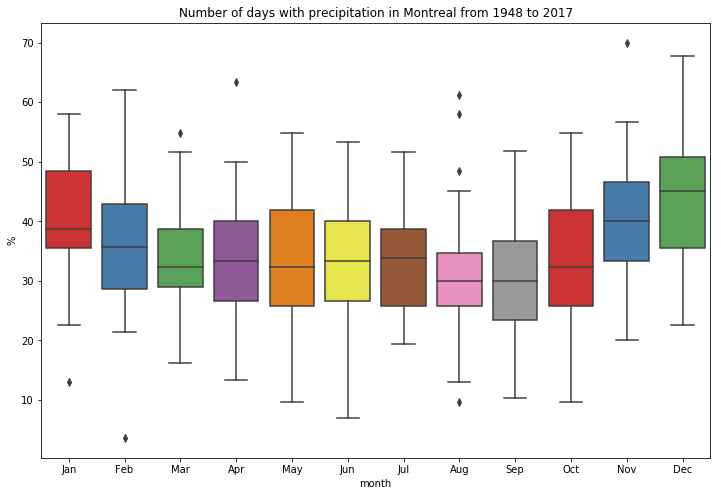

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt 
ax = plt.axes()
sns.boxplot(x="month", y="Prcp1", data=indice_precipitation, palette="Set1") 

ax.set_title('Number of days with precipitation in Montreal from 1948 to 2017')
ax.set_ylabel('%')

figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

- Histogram: <b>barplot()</b> function

For this example, we will plot the mean accumulation of prepicipitation by month, to do this we must use 'sum' variable. 

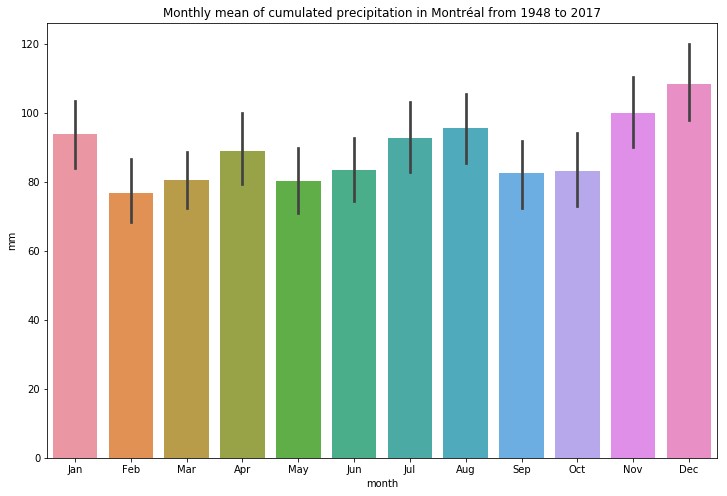

In [41]:
ax = plt.axes()
sns.barplot(x="month", y="sum", data=indice_precipitation)
ax.set_title('Monthly mean of cumulated precipitation in Montréal from 1948 to 2017')
ax.set_ylabel('mm')

figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

- bivariate graph: <b>jointplot()</b> function

Jointplot displays a relationship between 2 variables (bivariate)

https://seaborn.pydata.org/generated/seaborn.jointplot.html


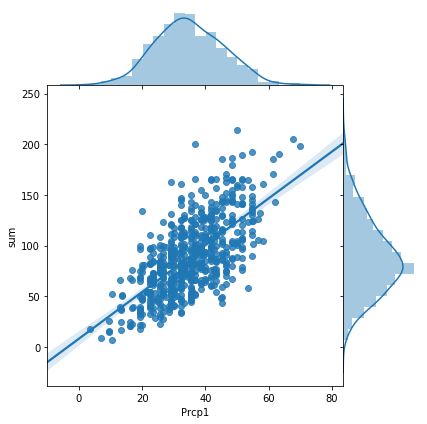

In [42]:
sns.jointplot(x="Prcp1", y="sum", data=indice_precipitation,kind='reg',
                   space=0, height=6, ratio=4)
plt.show()

# kind = 'kde' 
# kind="hex"
# kind="reg"

- bivariate graph: <b>pairplot()</b> function
https://seaborn.pydata.org/generated/seaborn.pairplot.html


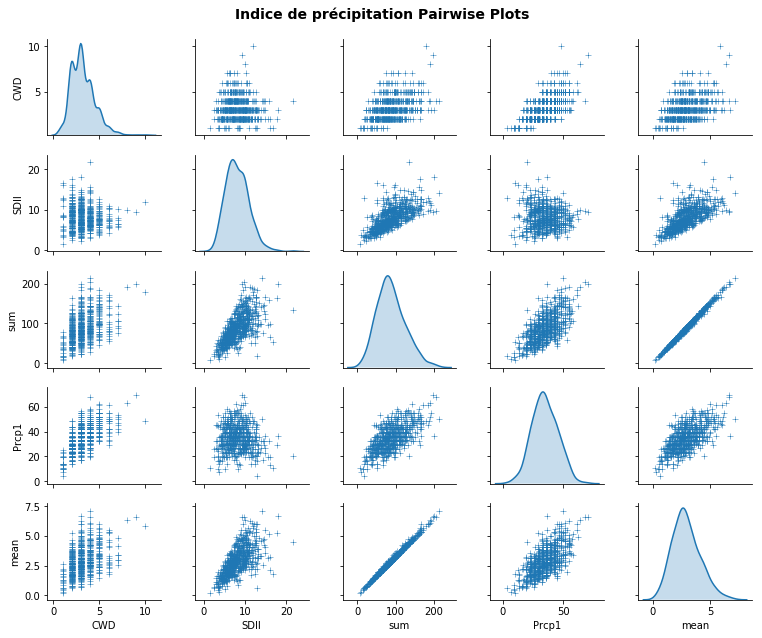

In [43]:
# Attributes of interest
cols = ['CWD', 
        'SDII', 
        'sum', 
        'Prcp1', 
        'mean']

pp = sns.pairplot(indice_precipitation[cols], 
                  height=1.8, aspect=1.2, markers="+",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Indice de précipitation Pairwise Plots', 
              fontsize=14, fontweight='bold')
plt.show()




- Correlation matrix:
The Pandas library has a method for calculating the correlations between each column of a DataFrame.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html



In [44]:
indice_precipitation.head()

,CDD,CWD,Prcp1,SDII,sum,mean,,year,month
datetime,,,,,,,,,
1961-01-31,14.0,3.0,29.032258,5.691111,55.09,1.777097,5.691111,1961,Jan
1961-02-28,12.0,3.0,28.571429,9.895000,80.87,2.888214,9.895000,1961,Feb
1961-03-31,16.0,3.0,25.806452,11.868750,97.59,3.148065,11.868750,1961,Mar
1961-04-30,4.0,3.0,50.000000,6.683333,102.70,3.423333,6.683333,1961,Apr
1961-05-31,5.0,3.0,41.935484,5.130000,70.22,2.265161,5.130000,1961,May


In [45]:
from tabulate import tabulate
print(tabulate(indice_precipitation.head() , headers='keys', tablefmt='pipe'))

| datetime            |   CDD |   CWD |   Prcp1 |     SDII |    sum |    mean |          |   year | month   |
|:--------------------|------:|------:|--------:|---------:|-------:|--------:|---------:|-------:|:--------|
| 1961-01-31 00:00:00 |    14 |     3 | 29.0323 |  5.69111 |  55.09 | 1.7771  |  5.69111 |   1961 | Jan     |
| 1961-02-28 00:00:00 |    12 |     3 | 28.5714 |  9.895   |  80.87 | 2.88821 |  9.895   |   1961 | Feb     |
| 1961-03-31 00:00:00 |    16 |     3 | 25.8065 | 11.8687  |  97.59 | 3.14806 | 11.8688  |   1961 | Mar     |
| 1961-04-30 00:00:00 |     4 |     3 | 50      |  6.68333 | 102.7  | 3.42333 |  6.68333 |   1961 | Apr     |
| 1961-05-31 00:00:00 |     5 |     3 | 41.9355 |  5.13    |  70.22 | 2.26516 |  5.13    |   1961 | May     |


We first drop 'year' column and then apply .corr() method. 

In [32]:
indice_precipitation2 = indice_precipitation.drop(["year"], axis=1)
corr_matrix = indice_precipitation2.corr()
corr_matrix

,CDD,CWD,Prcp1,SDII,sum,mean,
CDD,1.000000,-0.288579,-0.687758,0.025358,-0.480416,-0.481019,0.025172
CWD,-0.288579,1.000000,0.631665,-0.040071,0.418940,0.417954,-0.039654
Prcp1,-0.687758,0.631665,1.000000,-0.064514,0.661685,0.663935,-0.064554
SDII,0.025358,-0.040071,-0.064514,1.000000,0.659944,0.661113,0.999642
sum,-0.480416,0.418940,0.661685,0.659944,1.000000,0.997694,0.660287
mean,-0.481019,0.417954,0.663935,0.661113,0.997694,1.000000,0.661422
,0.025172,-0.039654,-0.064554,0.999642,0.660287,0.661422,1.000000


In [34]:
from tabulate import tabulate
print(tabulate(corr_matrix, headers='keys', tablefmt='pipe'))

|       |        CDD |        CWD |      Prcp1 |       SDII |       sum |      mean |            |
|:------|-----------:|-----------:|-----------:|-----------:|----------:|----------:|-----------:|
| CDD   |  1         | -0.288579  | -0.687758  |  0.0253577 | -0.480416 | -0.481019 |  0.0251715 |
| CWD   | -0.288579  |  1         |  0.631665  | -0.0400715 |  0.41894  |  0.417954 | -0.0396542 |
| Prcp1 | -0.687758  |  0.631665  |  1         | -0.0645136 |  0.661685 |  0.663935 | -0.0645538 |
| SDII  |  0.0253577 | -0.0400715 | -0.0645136 |  1         |  0.659944 |  0.661113 |  0.999642  |
| sum   | -0.480416  |  0.41894   |  0.661685  |  0.659944  |  1        |  0.997694 |  0.660287  |
| mean  | -0.481019  |  0.417954  |  0.663935  |  0.661113  |  0.997694 |  1        |  0.661422  |
|       |  0.0251715 | -0.0396542 | -0.0645538 |  0.999642  |  0.660287 |  0.661422 |  1         |


We can call the <b> .heatmap () </b> function to visualize our correlation matrix and thus facilitate our interpretations.

In [35]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr_matrix, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Matrix: Precipitation Indices Montreal Station', 
              fontsize=14, 
              fontweight='bold')
plt.show()

NameError: name 'plt' is not defined

- Graphiques 3D: 

### Bonus: add correlation indices with the scipy library


The <b> stats </b> module of the <b> Scipy library </b> has many statistical functions.
https://docs.scipy.org/doc/scipy/reference/stats.html


In [24]:
def corr_pearson(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
   # r, _ = stats.spearmanr(x, y)
    ax = plt.gca()   
    pos = (0, .9) 
    color2='red'                                                                   
    ax.annotate("Pearson = {:.2f}".format(r) + p_stars,
                xy=pos, xycoords=ax.transAxes, color=color2, fontweight='bold')
    

def corr_spearman(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
   # r, _ = stats.spearmanr(x, y)
    ax = plt.gca()  
    pos = (0, .6) 
    color2='darkgreen' 
    ax.annotate("Spearman = {:.2f}".format(r) + p_stars,
                xy=pos, xycoords=ax.transAxes, color=color2, fontweight='bold')

def corr_kendall(x, y, **kws):
    r, p = stats.kendalltau(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
   # r, _ = stats.spearmanr(x, y)
    ax = plt.gca()   
    pos = (0, .3) 
    color2='darkorange' 
    ax.annotate("Kendall = {:.2f}".format(r) + p_stars,
                xy=pos, xycoords=ax.transAxes, color=color2, fontweight='bold')

In [25]:
indice_precipitation.head()

,CDD,CWD,Prcp1,SDII,sum,mean,,year,month
datetime,,,,,,,,,
1961-01-31,14.0,3.0,29.032258,5.691111,55.09,1.777097,5.691111,1961,Jan
1961-02-28,12.0,3.0,28.571429,9.895000,80.87,2.888214,9.895000,1961,Feb
1961-03-31,16.0,3.0,25.806452,11.868750,97.59,3.148065,11.868750,1961,Mar
1961-04-30,4.0,3.0,50.000000,6.683333,102.70,3.423333,6.683333,1961,Apr
1961-05-31,5.0,3.0,41.935484,5.130000,70.22,2.265161,5.130000,1961,May


In [26]:
indice_month=indice_precipitation[["CWD", "SDII", "sum", "Prcp1"]].loc[(indice_precipitation["month"]=="Jan")]

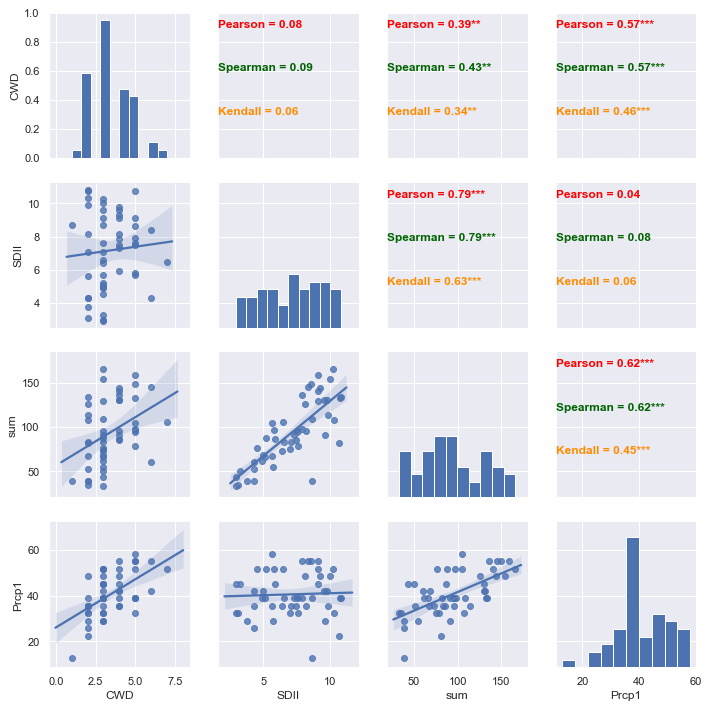

In [27]:
from scipy import stats
import seaborn as sns; sns.set()

g = sns.PairGrid(indice_month[["CWD", "SDII", "sum", "Prcp1"]]) 

g.map_upper(corr_pearson) 
g.map_upper(corr_spearman) 
g.map_upper(corr_kendall) 
g.map_lower(sns.regplot) 
g.map_diag(plt.hist) 
g.set(alpha=0.5)
plt.show()